# Kecenderungan dalam Deret Waktu

Misalkan suatu deret waktu memiliki fungsi nilaitengah konstan. Model untuk deret waktu tersebut dapat dituliskan sebagai berikut:

$Y_t=\mu_t+X_t$

dengan $E(X_t)=0$ untuk semua $t$.

## Kecenderungan Linear

Deret dikatakan memiliki kecenderungan linear dalam waktu jika $\mu_t$ dapat dinyatakan sebagai:

$\mu_t=\beta_0+\beta_1t$

Berikut simulasi deret yang memiliki kecenderungan linear dalam waktu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
# membangkitkan data waktu dalam bentuk array (misalnya, 100 bulan)
np.random.seed(3001)
n=100
t = np.arange(n)

# Membuat deret dengan kecenderungan linear
beta1 = 0.5
beta0 = 10
deret = beta0 + beta1*t

# Menambahkan ingar acak
noise = np.random.normal(scale=2, size=n)  # Noise dengan standar deviasi 2
time_series = deret + noise  # Menggabungkan tren dengan noise

# Membuat DataFrame untuk menyimpan data
df = pd.DataFrame({"Time": pd.date_range(start="2017-01-01", periods=100, freq="M"),
                   "Value": time_series})


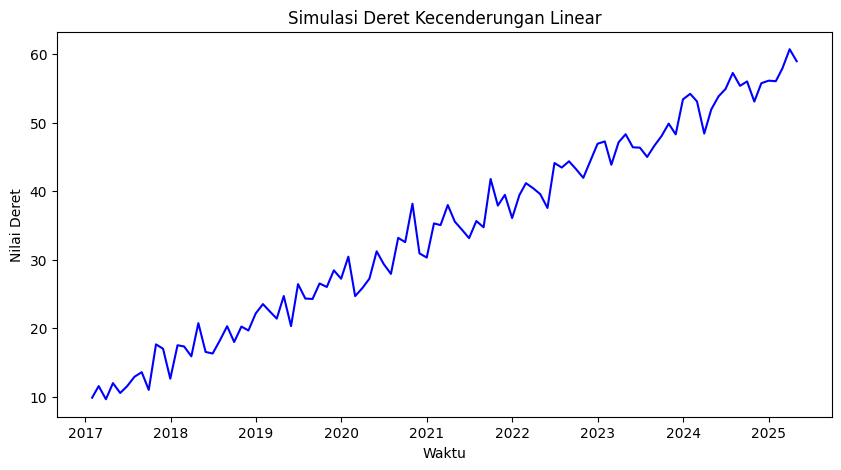

In [3]:
# Plot deret waktu dengan tren linear
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["Value"], color="b")
plt.xlabel("Waktu")
plt.ylabel("Nilai Deret")
plt.title("Simulasi Deret Kecenderungan Linear")
plt.show()

Berdasarkan plot tersebut terlihat bahwa adanya korelasi positif yang kuat antara waktu dan nilai. Dari plot ini memberikan dugaan kalau terdapat pola atau kecenderungan  linier dalam data.

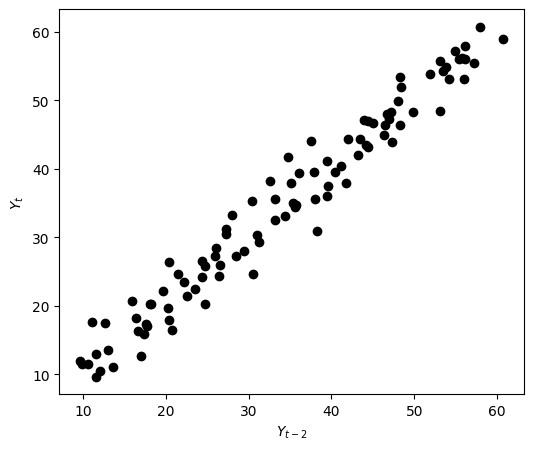

In [4]:
#menampilkan scatterplot antara Yt dan Yt-2
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.Value, lag=1, c='k')
plt.xlabel(r'$Y_{t-2}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

antara t dengan t-1 bukan yt dengan yt-1

In [5]:
# Konversi kolom Time menjadi angka (misalnya jumlah bulan sejak periode pertama)
df["Time_Numeric"] = (df["Time"].dt.to_period("M") - df["Time"].dt.to_period("M").min()).apply(lambda x: x.n)

# Hitung korelasi antara Time_Numeric dan Value
correlation = df["Time_Numeric"].corr(df["Value"])

print(f"Nilai korelasi antara Time dan Value: {correlation:.4f}")

Nilai korelasi antara Time dan Value: 0.9908


In [6]:
# Mendefinisikan variabel independen (X) dan dependen (Y)
X = df["Time_Numeric"]
Y = df["Value"]

#memanggil package statsmodels
import statsmodels.api as sm

# Tambahkan konstanta (intercept) ke model regresi
X = sm.add_constant(X)

# Buat dan jalankan model regresi
model = sm.OLS(Y, X).fit()

# menampilkan ringkasan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5258.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           5.85e-87
Time:                        01:51:44   Log-Likelihood:                -208.21
No. Observations:                 100   AIC:                             420.4
Df Residuals:                      98   BIC:                             425.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.9308      0.389     25.517   

Bagaimana hasil pengepasan model regresi dibandingkan dengan nilai parameter asli?

Apakah model regresi yang dipaskan sudah bagus?
Berdasarkan R-Squared nilainya tinggi, namun perlu kita lakukan uji asumsi

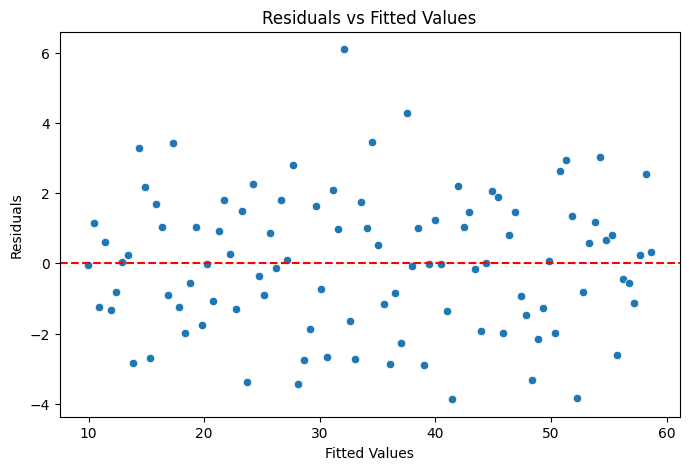

In [7]:
# Analisis Sisaan Model
import seaborn as sns

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(8,5))
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()



Apa interpretasi dari plot tersebut?

Berdasarkan plot tersebut, terlihat bahwa sisaan tidak memiliki pola tertentu sehingga terlihat acak maka ragamnya homogen.



In [8]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Uji Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)

print(f"P-value Breusch-Pagan Test: {bp_test[1]:.4f}")


P-value Breusch-Pagan Test: 0.8042


Apa kesimpulan dari nilai uji Breusch Pagan tersebut?

uji statistik tidak harus dilakukan, nanti dilakukan ketika ada kecurigaan. Namun setelah kita uji dengan BP-Test nilai signifikansi > alpha sehingga tidak ada bukti untuk menolak H0 atau terjadi pelanggaran

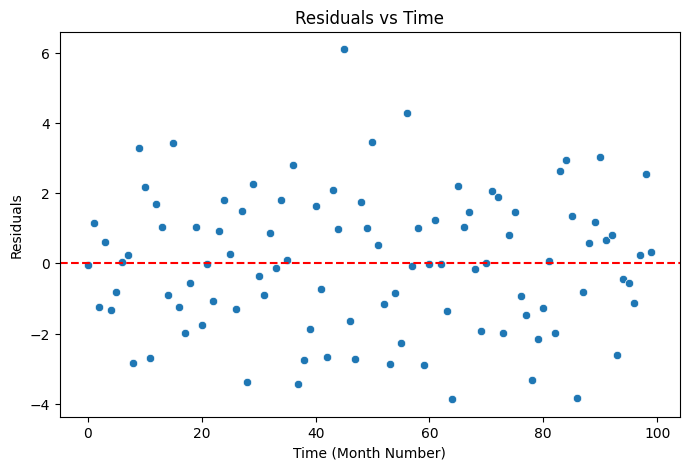

In [9]:
# Plot residual vs time
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Time_Numeric"], y=model.resid)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Time (Month Number)")
plt.ylabel("Residuals")
plt.title("Residuals vs Time")
plt.show()


  Plot di atas untuk cek autokorelasi. Dilihat bahwa autokorelasi antar residual dan time yang tidak ada pola tertentu.

<Figure size 800x500 with 0 Axes>

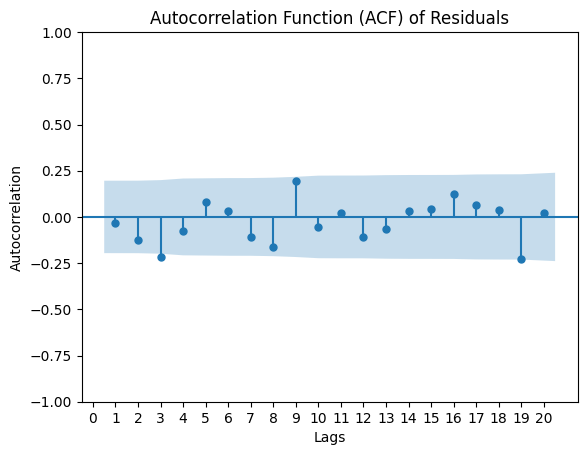

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(8, 5))
plot_acf(model.resid, lags=20, zero=False)
plt.xticks(ticks=range(0, 21, 1))
plt.title("Autocorrelation Function (ACF) of Residuals")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


Apa yang dapat Anda simpulkan dari plot di atas?

selain plot antara whitenoise, bisa digunakan plot ACF.
**interpretasi**
 Jika garis  melewati garis biru di awal dengan jelas maka signifikan, tapi karena kita tidak bisa melihat secara nyata maka diuji secara statistik


In [11]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Uji Ljung-Box untuk autokorelasi residual
ljung_box_test = acorr_ljungbox(model.resid, lags=range(1,21), return_df=True)

print("Ljung-Box Test p-value:")
print(ljung_box_test)


Ljung-Box Test p-value:
      lb_stat  lb_pvalue
1    0.120161   0.728860
2    1.690963   0.429351
3    6.544594   0.087920
4    7.201980   0.125592
5    7.864393   0.163869
6    7.969352   0.240357
7    9.201405   0.238518
8   12.091148   0.147183
9   16.211228   0.062599
10  16.560187   0.084680
11  16.601719   0.120221
12  18.022774   0.115001
13  18.564142   0.137250
14  18.668851   0.177992
15  18.898345   0.218377
16  20.713840   0.189774
17  21.187471   0.218017
18  21.361996   0.261545
19  27.761677   0.088124
20  27.827410   0.113548


Apa kesimpulan dari hasil uji Ljung-Box tersebut?

Dapat dilihat nilai p-value di setiap rows lebih besar dari alpha sehingga tidak ada  lag yang signifikan. berarti tidak ada autokorelasi yang signifikan

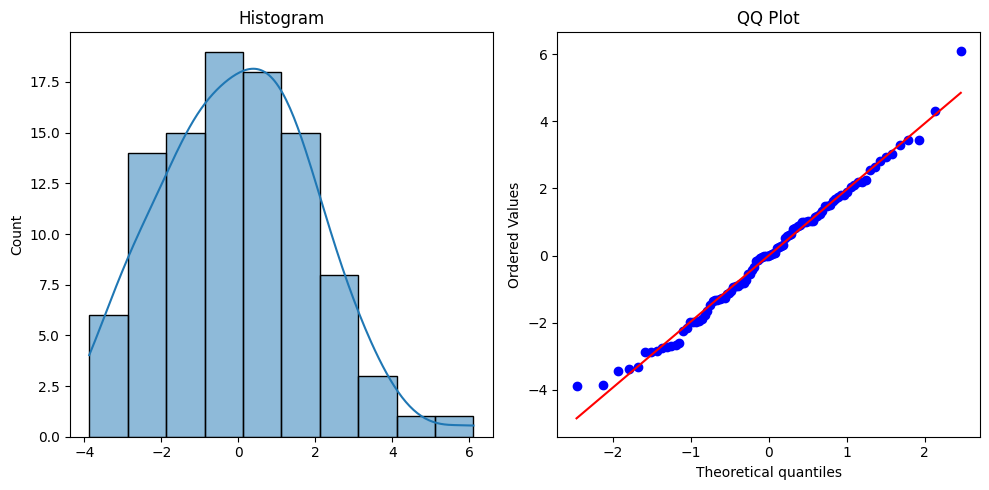

In [12]:
# Histogram Residuals
import scipy.stats as stats
fig, axes = plt.subplots(1, 2, figsize=(10,5))
# Histogram
sns.histplot(model.resid, kde=True, ax=axes[0])
axes[0].set_title('Histogram')

# QQ Plot
stats.probplot(model.resid, dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

Apa kesimpulan Anda berdasarkan plot di atas?

Normalitas bukan asumsi utama. Namun kita lihat dengan kedua grafik di atas, dari sudut pandang hampir menyerupai lonceng dan untuk QQ plot yang mengikuti garis linier.

Ingat Teorema limit pusat - N yang banyak akan mengikuti sebaran normal

In [13]:
# Uji Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(model.resid)
print(f"Shapiro-Wilk Test: Statistics = {shapiro_stat}, p-value = {shapiro_p_value}")

Shapiro-Wilk Test: Statistics = 0.988668110657226, p-value = 0.5586924903887203


Apakah kesimpulan Anda dari nilai uji Shapiro Wilk sama dengan kesimpulan Anda berdasarkan plot?

berdasarkan uji shapiro wilk, p-value lebih besar dari alpha sehingga gagal tolak H0 dalam artian berdistribusi normal.

## Kecenderungan Kuadratik

Deret dikatakan memiliki kecenderungan kuadratik dalam waktu jika $\mu_t$ dapat dinyatakan sebagai:

$\mu_t=\beta_0+\beta_1t+\beta_2t^2$


ternyata hubungan dengan t ada kuadratiknya

In [14]:
# Menentukan parameter simulasi
np.random.seed(2025)
n_periods = 120
beta_0, beta_1, beta_2= 50, 0.5, 0.02
noise = np.random.normal(0, 10, n_periods)
time = np.arange(n_periods)

# Membuat komponen kuadratik
quadratic_component = beta_0 + beta_1 * time + beta_2 * time**2

# Menambahkan noise untuk membuat data lebih realistis
data = quadratic_component + noise

# Membuat DataFrame
dates = pd.date_range(start='2010-01-01', periods=n_periods, freq='M')
df_quad = pd.DataFrame({'Date': dates, 'Value': data})

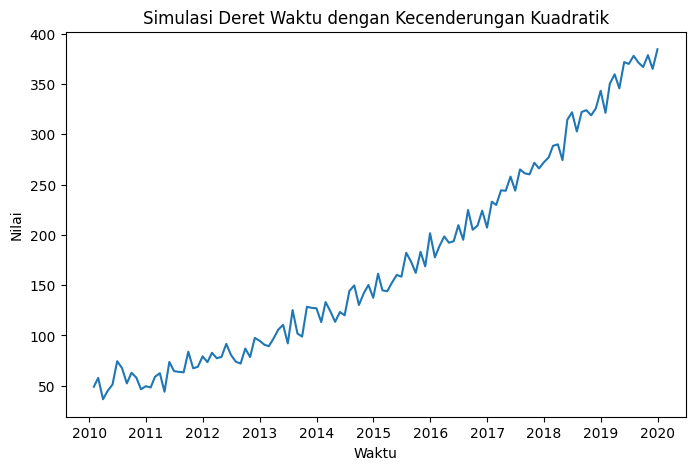

In [15]:
# Plot hasil simulasi deret waktu dengan kecenderungan kuadratik
plt.figure(figsize=(8, 5))
plt.plot(df_quad.Date, df_quad['Value'])
plt.title('Simulasi Deret Waktu dengan Kecenderungan Kuadratik')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.show()

kalau ini  bukan lagi garis lurus, tapi ini berbentuk kurva yang melengkung. bisa aja dimodelkan dengan linier tapi akan tidak bagus ketika dibandingkan dengan kuadratik.

In [16]:
# Mendefinisikan variabel independen (X) dan dependen (Y)
X = np.column_stack((time, time**2))
X = sm.add_constant(X)
Y = data


# Buat dan jalankan model regresi
model_quad = sm.OLS(Y, X).fit()

# menampilkan ringkasan hasil regresi
print(model_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     6603.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):          5.02e-121
Time:                        01:51:52   Log-Likelihood:                -441.14
No. Observations:                 120   AIC:                             888.3
Df Residuals:                     117   BIC:                             896.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.7612      2.607     19.855      0.0

ini x1 = t , x2=t^2

** TUGAS modelkan dengan t aja dan t^2 aja.**

kalau bisa dibikin dalam 1 plot tapi bedakan warna garisnya. dan cek asumsinya udah terpeneuhi atau belum untuk masing-masing model

In [18]:
# Mendefinisikan variabel independen (X) dan dependen (Y)
X1 = time  # Hanya menggunakan time
X1 = sm.add_constant(X1)  # Menambahkan konstanta
Y = data

# Buat dan jalankan model regresi
model_time = sm.OLS(Y, X1).fit()

# Menampilkan ringkasan hasil regresi
print(model_time.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1984.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           1.20e-75
Time:                        01:53:35   Log-Likelihood:                -552.43
No. Observations:                 120   AIC:                             1109.
Df Residuals:                     118   BIC:                             1114.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3710      4.420      0.763      0.4

In [19]:
# Mendefinisikan variabel independen (X) dan dependen (Y)
X2 = time**2  # Hanya menggunakan time^2
X2 = sm.add_constant(X2)  # Menambahkan konstanta
Y = data

# Buat dan jalankan model regresi
model_time2 = sm.OLS(Y, X2).fit()

# Menampilkan ringkasan hasil regresi
print(model_time2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.174e+04
Date:                Thu, 13 Feb 2025   Prob (F-statistic):          5.54e-120
Time:                        01:53:38   Log-Likelihood:                -448.64
No. Observations:                 120   AIC:                             901.3
Df Residuals:                     118   BIC:                             906.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.6303      1.401     43.272      0.0

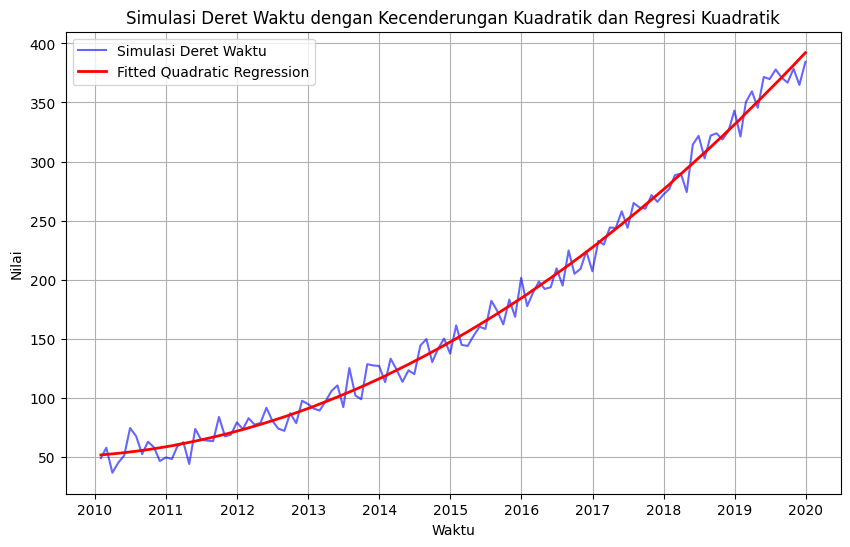

In [22]:
# Prediksi menggunakan model yang sudah dilatih
data_pred = model_quad.predict(X)

# Plot hasil simulasi deret waktu dan regresi kuadratik
plt.figure(figsize=(10, 6))
plt.plot(df_quad.Date, df_quad['Value'], label='Simulasi Deret Waktu', color='blue', alpha=0.6)
plt.plot(df_quad.Date, data_pred, label='Fitted Quadratic Regression', color='red', linewidth=2)
plt.title('Simulasi Deret Waktu dengan Kecenderungan Kuadratik dan Regresi Kuadratik')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

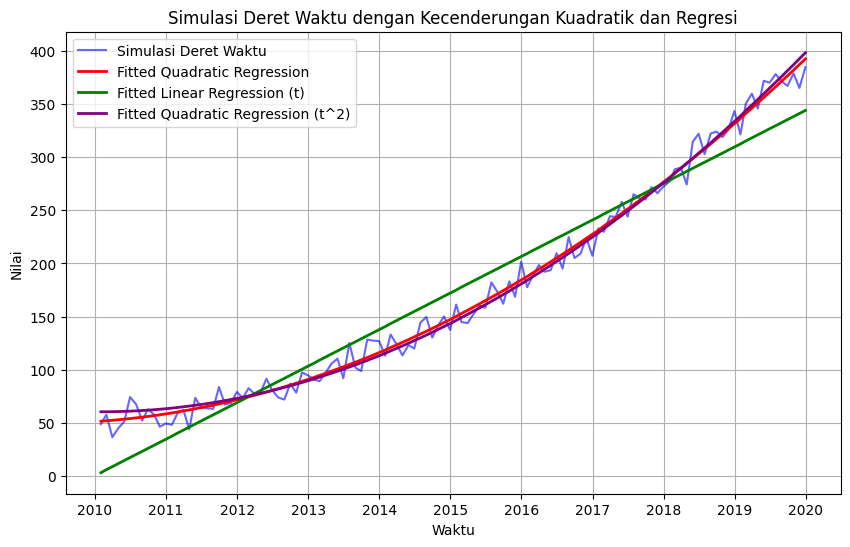

In [21]:
# Prediksi menggunakan model yang sudah dilatih
data_pred_quad = model_quad.predict(X)  # Prediksi model kuadratik
data_pred_time = model_time.predict(X1) # Prediksi model t saja
data_pred_time2 = model_time2.predict(X2) # Prediksi model t^2 saja


# Plot hasil simulasi deret waktu dan regresi
plt.figure(figsize=(10, 6))
plt.plot(df_quad.Date, df_quad['Value'], label='Simulasi Deret Waktu', color='blue', alpha=0.6)
plt.plot(df_quad.Date, data_pred_quad, label='Fitted Quadratic Regression', color='red', linewidth=2)
plt.plot(df_quad.Date, data_pred_time, label='Fitted Linear Regression (t)', color='green', linewidth=2)
plt.plot(df_quad.Date, data_pred_time2, label='Fitted Quadratic Regression (t^2)', color='purple', linewidth=2)


plt.title('Simulasi Deret Waktu dengan Kecenderungan Kuadratik dan Regresi')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

Plot tersebut membandingkan antara data simulasi deret waktu dengan kecenderungan kuadratik dengan model yang berbeda.


*   Garis merah (Fitted Quadratic Regression) menggunakan time dan time^2 sebagai prediktor dan model yang paling sesuai untuk data ini dengan data aslinya
*   Garis Hijau (Fitted Linier Regression) hanya menggunakan time sebagai prediktor menunjukkan tren linier meningkat dan belum dapat menangkap kurva dalam data
*   Garis Ungu (Fitted Quadratic Regression) menunjukkan pola kuadratik tapi kurang sesuai dibandingkan kuadratik yang lengkat



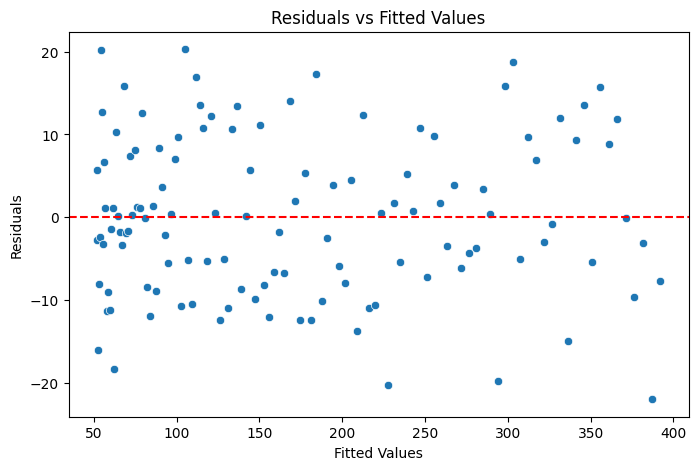

In [24]:
# cek asumsi model regresi kuadratik

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(8,5))
sns.scatterplot(x=model_quad.fittedvalues, y=model_quad.resid)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


In [25]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Uji Breusch-Pagan
bp_test = het_breuschpagan(model_quad.resid, model_quad.model.exog)

print(f"P-value Breusch-Pagan Test: {bp_test[1]:.4f}")

P-value Breusch-Pagan Test: 0.4354


Berdasarkan plot dan jugaan uji statistik BP memenuhi asumsi homogen. sehingga ragam rwsidual homogen dan tidak ada pola

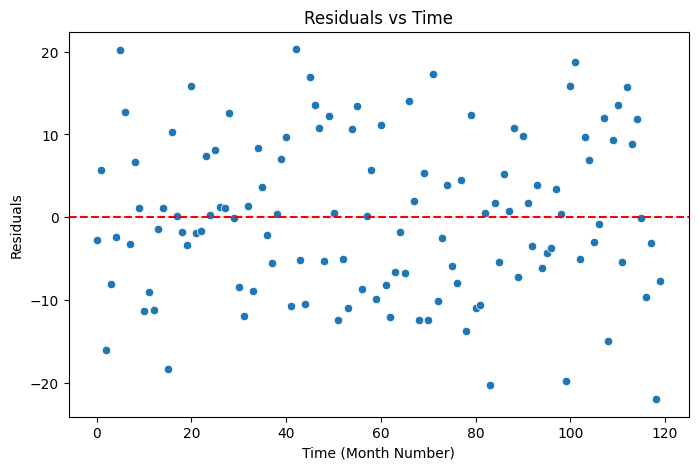

In [26]:
# Asumsi Autokorelasi
# Plot residual vs time
plt.figure(figsize=(8,5))
# Use 'time' variable, which has length 120, instead of 'df["Time_Numeric"]'
sns.scatterplot(x=time, y=model_quad.resid)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Time (Month Number)")
plt.ylabel("Residuals")
plt.title("Residuals vs Time")
plt.show()

<Figure size 800x500 with 0 Axes>

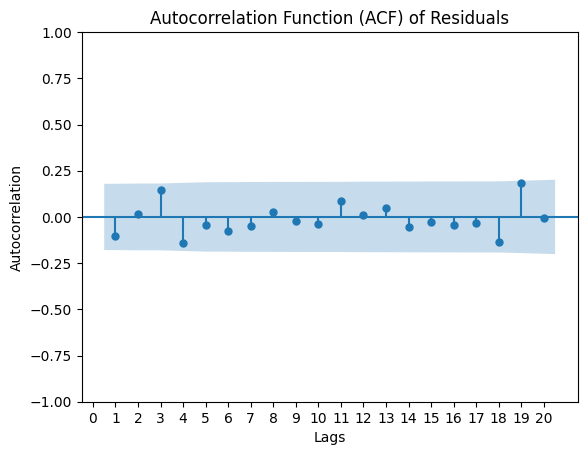

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(8, 5))
plot_acf(model_quad.resid, lags=20, zero=False)
plt.xticks(ticks=range(0, 21, 1))
plt.title("Autocorrelation Function (ACF) of Residuals")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

In [28]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Uji Ljung-Box untuk autokorelasi residual
ljung_box_test = acorr_ljungbox(model_quad.resid, lags=range(1,20), return_df=True)

print("Ljung-Box Test p-value:")
print(ljung_box_test)

Ljung-Box Test p-value:
      lb_stat  lb_pvalue
1    1.283393   0.257269
2    1.312712   0.518738
3    3.952152   0.266677
4    6.372570   0.172999
5    6.594370   0.252597
6    7.294764   0.294446
7    7.604234   0.368781
8    7.699596   0.463351
9    7.772514   0.557224
10   7.964266   0.632328
11   8.922550   0.629041
12   8.942863   0.707803
13   9.274047   0.751945
14   9.672043   0.785746
15   9.772476   0.833802
16  10.066898   0.863111
17  10.234731   0.893479
18  12.955595   0.794204
19  17.824158   0.534211


Berdasarkan plot residual vs time untuk mengecek aurokorelasi sudah tersebar acak

berdasrkan plot acf garisnya tidak ada yang melewati bayangan warna biru

dan berdasarkan nilai ljung box semua baris memiliki p-value > alpha

sehingga dapat disimpulkan bahwa residual tidak memiliki korelasi sehingga asumsi autokorelasi dipenuhi



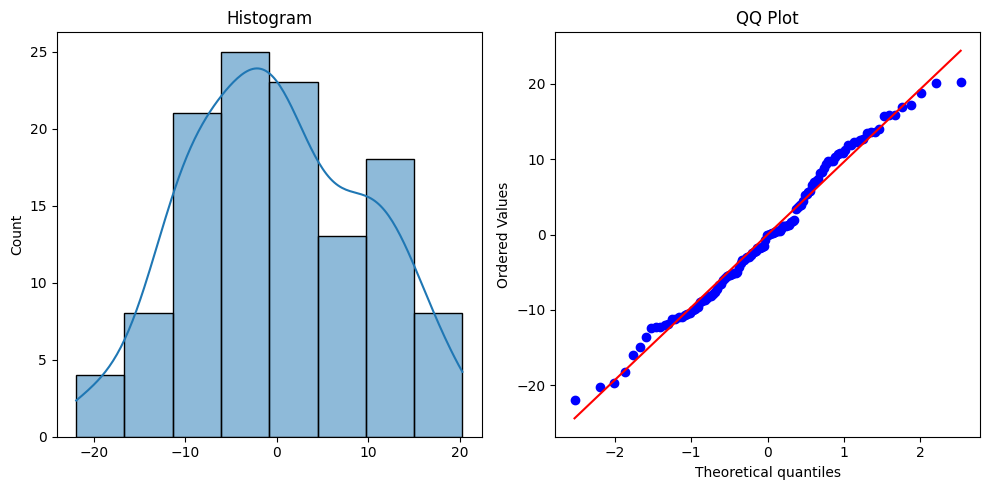

In [29]:
# Asumsi Normalitas
# Histogram Residuals
import scipy.stats as stats
fig, axes = plt.subplots(1, 2, figsize=(10,5))
# Histogram
sns.histplot(model_quad.resid, kde=True, ax=axes[0])
axes[0].set_title('Histogram')

# QQ Plot
stats.probplot(model_quad.resid, dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

In [30]:
# Uji Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(model_quad.resid)
print(f"Shapiro-Wilk Test: Statistics = {shapiro_stat}, p-value = {shapiro_p_value}")

Shapiro-Wilk Test: Statistics = 0.9838650151541809, p-value = 0.1621485706370721


**Uji Normalitas **

Berdasarkan plot histogram tampak bahwa tidak berbentuk lonceng , namun berdasarkan QQ plot telihat bahwa pengamatannya mengikuti garis linier.

Berdasarkan uji shapiro wilk diperoleh p-value lebih besar dari alpha sehingga asumsi normalitas terpenuhi.

**Kesimpulan**
Ketika kita memiliki data yang memiliki kecenderungan kuadratik lalu dimodelkan dengan linier atau time saja, dan dimpdelkan dengan time^2 saja maka akan memperoleh prediksi yang kurang akurat dan interprtasi yang tidak benar sehingga kesimpulan salah. Sehingga perlu menyertakan variabel time dan time^2 karena model akan dapat menangkap lengkungan dan tren dalam data dengan lebih akurat.

## Kecenderungan Musiman/Siklik

kalau musiman , tetap dan tidak panjang
kalau siklik,

Misalkan suatu deret waktu memiliki nilaitengah $\mu_t$ yang didefinisikan sebagai berikut:

$\mu_t=\beta_0+\beta_1 cos(2\pi f t)+\beta_2 sin(2\pi ft)$

Deret tersebut memiliki kecenderungan kosinus yang berpola musiman.

Bentuk lain fungsi nilaitengah dari kecenderungan musiman (misalnya untuk data bulanan) adalah $\mu_t$ berupa suatu konstanta sejumlah 12 yang nilai berbeda-beda. Nilai ini diinterpretasikan sebagai nilai harapan rata-rata data untuk masing-masing bulan, atau dapat dituliskan sebagai berikut:

$\mu_t=\beta_1$ , untuk $t=1,13,25,...$
       
$\mu_t=\beta_2$ , untuk $t=2,14,26,...$

$.$

$.$

$.$

$\mu_t=\beta_{12}$ , $untuk t=12,24,36,...$


In [31]:
# Menentukan parameter simulasi
np.random.seed(100)
n_periods = 120
beta0, beta1, beta2=50,-25, -2
freq=1/12

# Membuat komponen musiman
time = np.arange(n_periods)
seasonal_component = beta0+ beta1*np.cos(2*np.pi*time*freq)+beta2*np.sin(2*np.pi*time*freq)

# Menambahkan noise acak
noise = np.random.normal(0, 2, n_periods)

# Simulasi data dengan hanya komponen musiman dan noise (tanpa tren)
data = seasonal_component + noise

# Membuat index waktu (misalnya menggunakan bulan)
dates = pd.date_range(start='2010-01-01', periods=n_periods, freq='M')

# Membuat DataFrame untuk mempermudah analisis dan visualisasi
df_seasonal = pd.DataFrame({'Date': dates, 'Value': data})


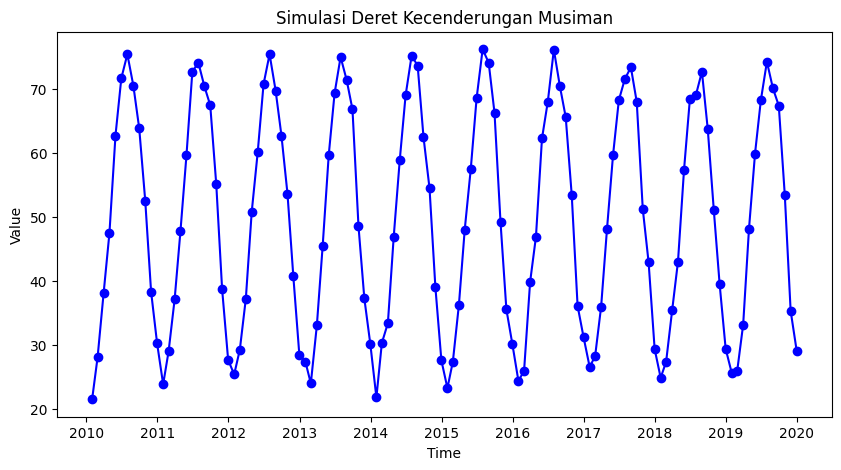

In [32]:
# Plot data deret waktu
plt.figure(figsize=(10, 5))
plt.plot(df_seasonal["Date"], df_seasonal["Value"],'-ob')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Simulasi Deret Kecenderungan Musiman")
plt.show()


Misalkan deret tersebut merupakan deret musiman dengan periode musiman 12.

In [33]:
# membuat dummy variabel musiman dalam data
from statsmodels.tsa.deterministic import Seasonality
musim= Seasonality(12, initial_period=1).in_sample(df_seasonal.index)
musim.columns=['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']

dijadikan peubah kategorik , misal Januari, Februari sebagai dummy. lalu diregresikan dan dianggap sebagai x1 , x2 dst.

jadi Y nya adalah datanya, dan X nya adalah variabel dummy yang dibentuk

In [ ]:
musim

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
# pengepasan model regresi tanpa intercept
musiman=sm.OLS(df_seasonal["Value"],musim).fit()

In [35]:
print(musiman.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     879.7
Date:                Thu, 13 Feb 2025   Prob (F-statistic):          2.94e-100
Time:                        02:15:14   Log-Likelihood:                -244.46
No. Observations:                 120   AIC:                             512.9
Df Residuals:                     108   BIC:                             546.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Januari       24.4468      0.619     39.524      0.0

Bagaimana interpretasi dari hasil tersebut?
Model di atas ialah ketika tidak disertakan intersept.
Sehingga setiap koefisien bulan secara langsung mereperesentasikan nilai rata-rata deret waktu untuk bulan tersebut.
Misal pada bulan januari coef nya 24.446 sehingga pada bulan januari memiliki nilai rata-rata 24.446

jadi setiap bulan direpresentasikan secara independen tanpa membandingkan dengan bulan lainnya.

In [36]:
# Analisis Sisaan
# mendapatkan sisaan terbakukan
influence=musiman.get_influence()
std_resid=influence.resid_studentized_internal

mapping={1:'$J$',2:'$F$',3:'$M$',
 4:'$A$',5:'$M$',6:'$J$',
 7:'$J$',8:'$A$',9:'$S$',
 10:'$O$',11:'$N$',12:'$D$'}

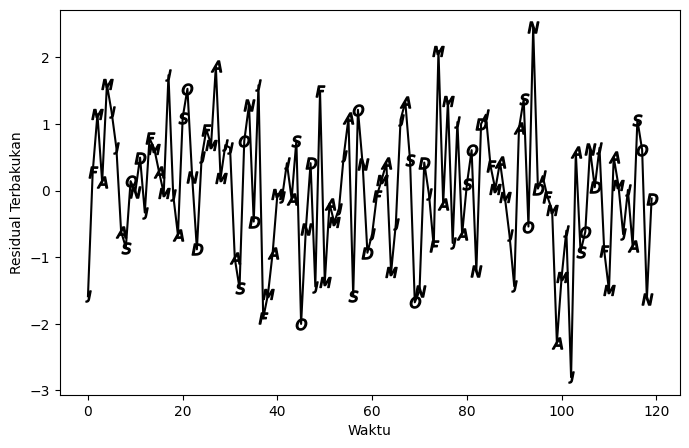

In [37]:
#memetakan sisaan dengan bentuk plot sesuai simbol bulan/musim
plt.figure(figsize=(8,5))
for i in range(len(std_resid)):
 plt.plot(i, std_resid[i], marker=mapping[i%12+1],
 color='black', markersize=8)

#membuat plot sisaan terbakukan
plt.plot(std_resid, color='black')
plt.xlabel('Waktu'), plt.ylabel('Residual Terbakukan')
plt.show()


tidak ada pola di bulan-bulan tertentu.

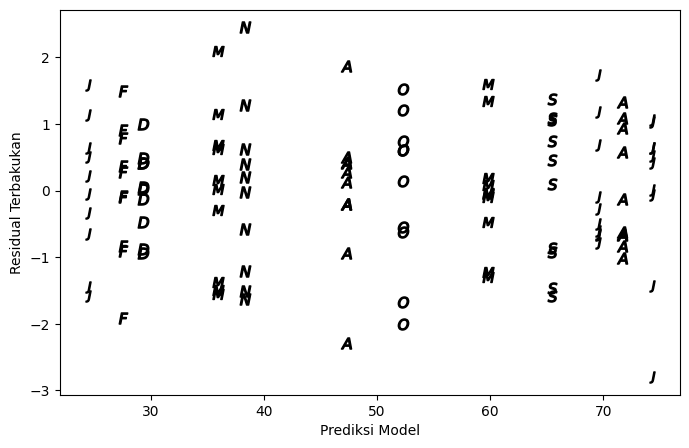

In [38]:
# membuat plot fittedvalues dengan residual terbakukan dengan simbol bulan
plt.figure(figsize=(8,5))
for i in range(len(std_resid)):
  plt.plot(musiman.fittedvalues.values[i],
           std_resid[i], marker=mapping[i%12+1],
           color='black', markersize=8)
plt.xlabel('Prediksi Model'),plt.ylabel('Residual Terbakukan')
plt.show()

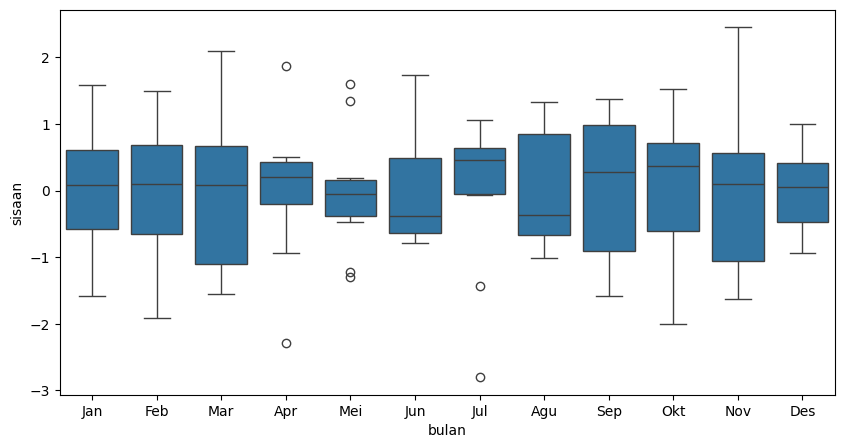

In [39]:
#membuat list daftar bulan
bulan=['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des']*10

#membuat dataframe untuk mengidentifikasi sisaan dan periode bulannya
box_sisaan=pd.DataFrame(zip(bulan[:-1], std_resid),
columns=['bulan','sisaan'])

#membuat boxplot per buln
plt.figure(figsize=(10,5))
sns.boxplot(x='bulan',y='sisaan',data=box_sisaan)
plt.show()

di bulan-bulan terutut tidak ada pola-pola tertentu

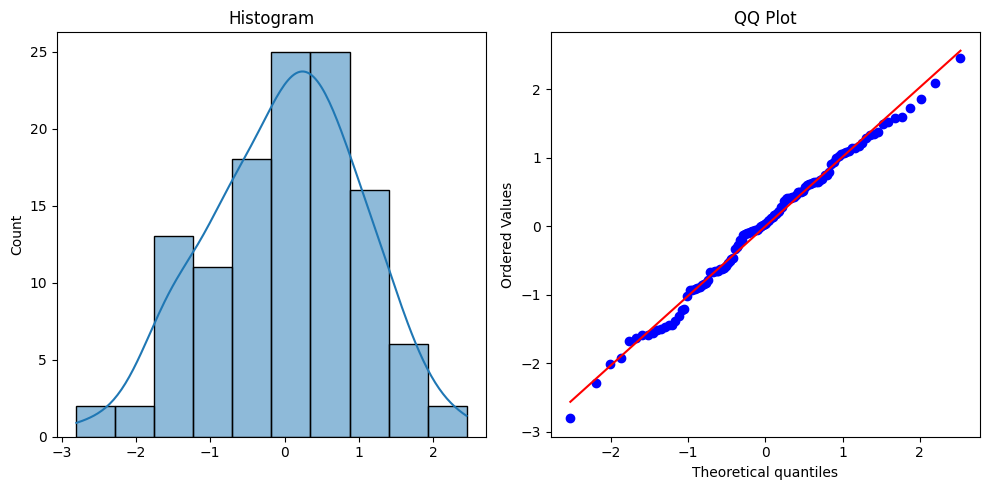

In [40]:
# Histogram Residuals
import scipy.stats as stats
fig, axes = plt.subplots(1, 2, figsize=(10,5))
# Histogram
sns.histplot(std_resid, kde=True, ax=axes[0])
axes[0].set_title('Histogram')

# QQ Plot
stats.probplot(std_resid, dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

Berdasarkan plot-plot tersebut apakah dapat dikatakan bahwa model yang dipaskan sudah tepat?

dari plot kita sudah menduga bahwa memenuhi asumsi normalitas.
Hitunglah statistik uji untuk mengecek asumsi model

In [41]:
# hitung statistik uji untuk mengecek asumsi model tanpa intersep

In [42]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Add a constant to your original regression model
musiman = sm.OLS(df_seasonal["Value"], sm.add_constant(musim)).fit()

# Now, perform the Breusch-Pagan test
bp_test = het_breuschpagan(musiman.resid, musiman.model.exog)

print(f"P-value Breusch-Pagan Test: {bp_test[1]:.4f}")

P-value Breusch-Pagan Test: 0.8576


Nilai p-value pada uji BP untuk mengecek kohomogenan ragam pada model tanpa intersep lebih besar dari alpha sehingga memenuhi asumsi homogen ragam

In [43]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Uji Ljung-Box untuk autokorelasi residual
ljung_box_test = acorr_ljungbox(musiman.resid, lags=range(1,20), return_df=True)

print("Ljung-Box Test p-value:")
print(ljung_box_test)


Ljung-Box Test p-value:
      lb_stat  lb_pvalue
1    0.000335   0.985407
2    0.027709   0.986241
3    0.619979   0.891844
4    1.837971   0.765528
5    1.859383   0.868240
6    1.918941   0.927001
7    1.919793   0.964146
8    4.081463   0.849700
9    6.135454   0.726289
10   6.135638   0.803742
11   6.732172   0.820340
12   7.863541   0.795701
13  11.921705   0.534074
14  11.928980   0.612006
15  13.774308   0.542710
16  13.853806   0.609604
17  14.119281   0.658641
18  15.251353   0.644642
19  15.950092   0.660605


untuk mengecek autokorelasi residual dengan nilai ljung box pada model tanpa intersep dipeoleh untuk semua  p-value lebih besar dari alpha sehingga memenuhi asumsi autokorelasi dalam artian residualnya tidak memiliki autokorelasi

In [44]:
# Uji Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(musiman.resid)
print(f"Shapiro-Wilk Test: Statistics = {shapiro_stat}, p-value = {shapiro_p_value}")

Shapiro-Wilk Test: Statistics = 0.992296012216462, p-value = 0.7487496520228905


Nilai p-value untuk uji shapiro wilk lebih besar dari alpha sehingga memenuhi asumsi normalitas.

In [45]:
# pengepasan model regresi dengan intersep
musiman_int=sm.OLS(df_seasonal["Value"],sm.add_constant(musim.iloc[:,1:])).fit()

In [46]:
print(musiman_int.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     879.7
Date:                Thu, 13 Feb 2025   Prob (F-statistic):          2.94e-100
Time:                        02:20:25   Log-Likelihood:                -244.46
No. Observations:                 120   AIC:                             512.9
Df Residuals:                     108   BIC:                             546.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4468      0.619     39.524      0.0

Perhatikan hasil pengepasan model dengan intersep. Bandingkan hasilnya dengan pengepasan tanpa intersep. Bagaimana interpretasi model dengan intersep?


*   Model tanpa Intersep: Koefisien setiap bulan merepresentasikan nilai rata-rata deret waktu untuk bulan tersebut.
*   Model dengan Intersep: Koefisien setiap bulan merepresentasikan perbedaan nilai rata-rata deret waktu untuk bulan tersebut dibandingkan dengan bulan referensi (di contoh Januari). Intersep menunjukkan nilai rata-rata deret waktu untuk bulan referensi.

Misalnya, jika koefisien Maret adalah 11, artinya nilai rata-rata deret waktu untuk bulan Maret diperkirakan 11 unit lebih tinggi daripada bulan Januari karema janur


Apakah model dengan intersep sudah memenuhi asumsi regresi?



In [ ]:
# uji asumsi model dengan intersep

In [47]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Add a constant to your original regression model
musiman = sm.OLS(df_seasonal["Value"], sm.add_constant(musim)).fit()

# Now, perform the Breusch-Pagan test
bp_test = het_breuschpagan(musiman_int.resid, musiman_int.model.exog)

print(f"P-value Breusch-Pagan Test: {bp_test[1]:.4f}")

P-value Breusch-Pagan Test: 0.7990


In [48]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Uji Ljung-Box untuk autokorelasi residual
ljung_box_test = acorr_ljungbox(musiman_int.resid, lags=range(1,20), return_df=True)

print("Ljung-Box Test p-value:")
print(ljung_box_test)

Ljung-Box Test p-value:
      lb_stat  lb_pvalue
1    0.000335   0.985407
2    0.027709   0.986241
3    0.619979   0.891844
4    1.837971   0.765528
5    1.859383   0.868240
6    1.918941   0.927001
7    1.919793   0.964146
8    4.081463   0.849700
9    6.135454   0.726289
10   6.135638   0.803742
11   6.732172   0.820340
12   7.863541   0.795701
13  11.921705   0.534074
14  11.928980   0.612006
15  13.774308   0.542710
16  13.853806   0.609604
17  14.119281   0.658641
18  15.251353   0.644642
19  15.950092   0.660605


In [49]:
# Uji Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(musiman_int.resid)
print(f"Shapiro-Wilk Test: Statistics = {shapiro_stat}, p-value = {shapiro_p_value}")

Shapiro-Wilk Test: Statistics = 0.9922960122164619, p-value = 0.7487496520228828


berdasarkan uji asumsi


*   Uji BP diperoleh signifikansi lebih besar dari aplha sehingga ragam homoen

*   Uji ljung box diperoleh setiap amatannya memiliki p-value lebih besar dari alpha sehingga tidak ada autokorelasi dari residual

*   Uji Shapiro wilk diperoleh nilai p-value lebih besar dari alpha sehingga residual berdistribusi normal



## Kecenderungan Linear dan Musiman

In [50]:
# Parameter
np.random.seed(22025)
n = 100  # Jumlah titik data
x = np.arange(n)

# Komponen trend linear
a, b = 0.5, 10 #(intersep dan slope)
trend = a * x + b

# Komponen musiman (sinusoidal)
seasonality = 5 * np.sin(2 * np.pi * x / 12)

# Noise acak
noise = np.random.normal(scale=2, size=n)

# Gabungan semua komponen
series = trend + seasonality + noise


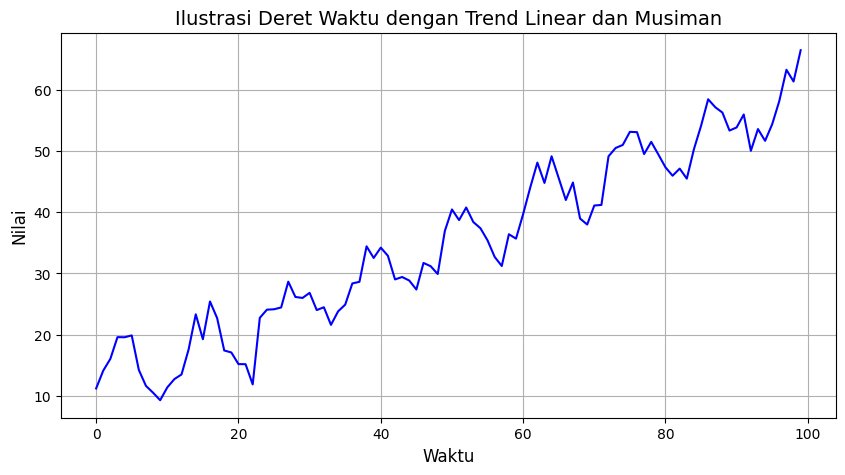

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(x, series, color='b')
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.title('Ilustrasi Deret Waktu dengan Trend Linear dan Musiman', fontsize=14)
plt.grid()
plt.show()

Untuk deret tersebut, dibutuhkan model yang mampu menangkap kecenderungan linear (tren) sekaligus kecenderungan musiman dalam deret. Salah satu model sederhana yang dapat digunakan adalah model regresi linear dengan variabel musiman.


ini trennya aditif karena ragamnya hampir sama disetiap periode.

In [52]:
# mengubah data menjadi format dataframe
df_mix = pd.DataFrame(series, columns=['Value'])

# mengekstrak komponen musiman dalam data
from statsmodels.tsa.deterministic import Seasonality
season= Seasonality(12, initial_period=1).in_sample(df_mix.index)
season.columns=['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']

In [55]:
season['period']=x

model_mix=sm.OLS(series,season).fit()

In [56]:
print(model_mix.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     472.3
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           1.07e-73
Time:                        02:36:45   Log-Likelihood:                -200.88
No. Observations:                 100   AIC:                             427.8
Df Residuals:                      87   BIC:                             461.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Januari       10.1295      0.721     14.055      0.0

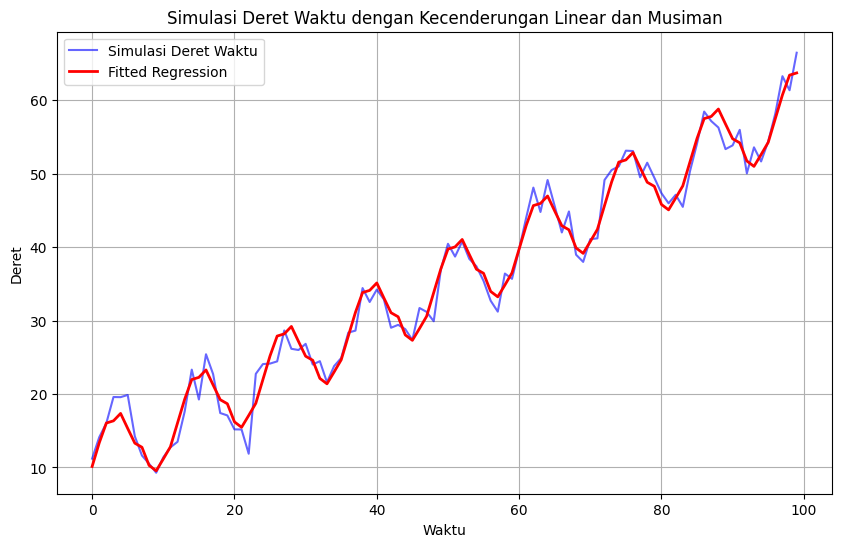

In [57]:
# Prediksi menggunakan model yang sudah dilatih
pred_mix = model_mix.predict(season)

# Plot hasil simulasi deret waktu dan regresi kuadratik
plt.figure(figsize=(10, 6))
plt.plot(x, series, label='Simulasi Deret Waktu', color='blue', alpha=0.6)
plt.plot(x, pred_mix, label='Fitted Regression', color='red', linewidth=2)
plt.title('Simulasi Deret Waktu dengan Kecenderungan Linear dan Musiman')
plt.xlabel('Waktu')
plt.ylabel('Deret')
plt.legend()
plt.grid(True)
plt.show()

Lakukan pengecekan asumsi model!

In [58]:
# uji asumsi model
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Assuming 'season' is your original independent variable data
X_with_const = sm.add_constant(season)  # Add a constant column

# Re-fit your model, if needed, with the constant
model_mix = sm.OLS(series, X_with_const).fit()

# Now, perform the Breusch-Pagan test
bp_test = het_breuschpagan(model_mix.resid, model_mix.model.exog)

print(f"P-value Breusch-Pagan Test: {bp_test[1]:.4f}")


P-value Breusch-Pagan Test: 0.9118


In [59]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Uji Ljung-Box untuk autokorelasi residual
ljung_box_test = acorr_ljungbox(model_mix.resid, lags=range(1,20), return_df=True)

print("Ljung-Box Test p-value:")
print(ljung_box_test)


Ljung-Box Test p-value:
      lb_stat  lb_pvalue
1    0.026922   0.869670
2    0.097054   0.952632
3    1.084593   0.780795
4    1.351835   0.852522
5    2.542951   0.770013
6    5.752746   0.451450
7    5.824206   0.560420
8    6.027048   0.644202
9    6.030118   0.736900
10  11.036617   0.354672
11  11.427225   0.408196
12  12.180722   0.431277
13  12.326888   0.501038
14  12.455387   0.569782
15  12.861790   0.612972
16  14.709618   0.546000
17  15.337385   0.571194
18  15.833991   0.604132
19  16.191853   0.644441


In [ ]:
# Uji Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(model_mix.resid)
print(f"Shapiro-Wilk Test: Statistics = {shapiro_stat}, p-value = {shapiro_p_value}")

Uji Asumsi


*   Uji BP diperoleh signifikansi lebih besar dari aplha sehingga ragam homoen

*   Uji ljung box diperoleh setiap amatannya memiliki p-value lebih besar dari alpha sehingga tidak ada autokorelasi dari residual

*   Uji Shapiro wilk diperoleh nilai p-value lebih besar dari alpha sehingga residual berdistribusi normal

Sehingga model seasonal ini baik karena memenuhi seluruh asumsi

Saat melihat plot dari suatu deret, terkadang kita tidak yakin komponen apa saja yang ada dalam deret. Misalkan, apakah deret tidak memuat tren? apakah ada tren? apakah ada komponen musiman? Untuk memastikan komponen apa saja yang ada dalam suatu deret, dapat dilakukan dengan dekomposisi deret. Dekomposisi deret bertujuan menguraikan deret menjadi 3 komponen, yaitu tren, musiman, dan noise.

In [60]:
# Melakukan dekomposisi untuk deret simulasi kecenderungan linear
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Value'], model='additive', period=12)

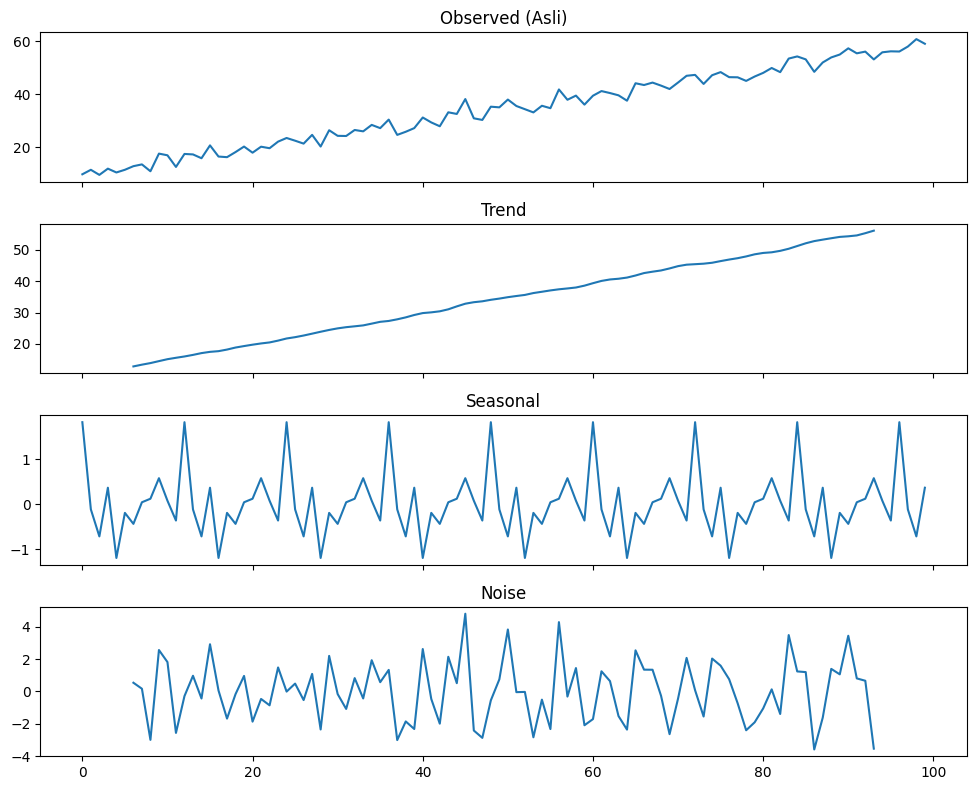

In [61]:
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result.observed.plot(ax=axes[0], title='Observed (Asli)')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Noise')

plt.tight_layout()
plt.show()

Bagaimana interpretasi hasil dekomposisi deret tersebut?

Deret ini adalah memiliki kecenderungan tren karena bentuknya lurus

hasil dekomposisi pada seasonal dia tidak ada karena masih bergerigi, kalau seasonal ada berarti dia lurus seperti trend

In [ ]:
# Melakukan dekomposisi untuk deret simulasi kecenderungan linear dan musiman
from statsmodels.tsa.seasonal import seasonal_decompose
result_mix = seasonal_decompose(df_mix['Value'], model='additive', period=12)

NameError: name 'result_mix' is not defined

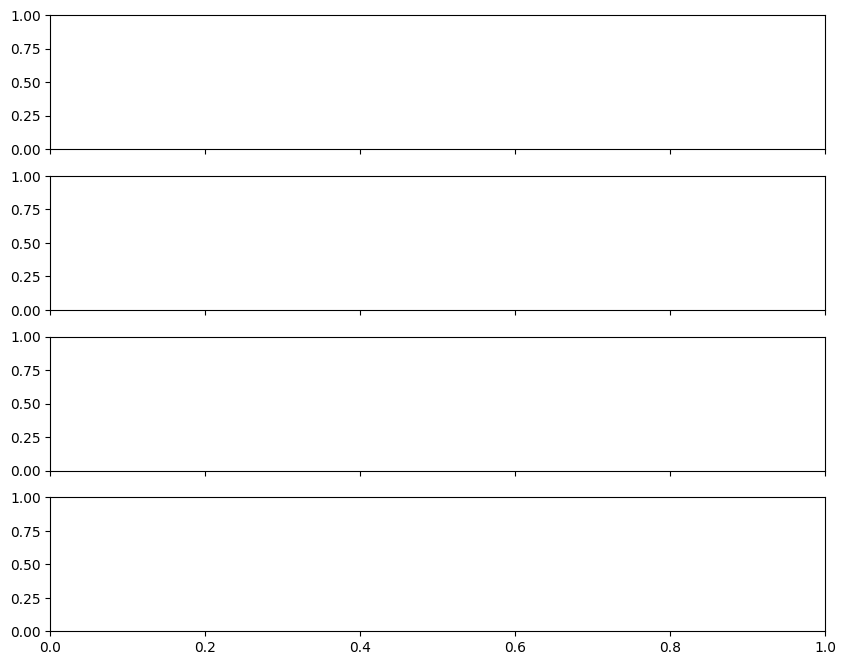

In [62]:
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result_mix.observed.plot(ax=axes[0], title='Observed (Asli)')
result_mix.trend.plot(ax=axes[1], title='Trend')
result_mix.seasonal.plot(ax=axes[2], title='Seasonal')
result_mix.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()


Bagaimana interpretasi hasil dekomposisi deret tersebut?

Ketika melakukan dekoposisi deret, perlu diperhatikan bahwa terdapat 2 jenis model untuk dekomposisi, yaitu model `Aditif` dan `multiplikatif`.

- Model `aditif` digunakan jika ragam deret relatif konstan atau kecil

- Model `multiplikatif` digunakan jika ragam deret besar

utamanya untuk menangkap pola musiman dan tren. dia saling menjumlahkan atau mengalikan.

Kita lihat dari prgrakan datanya apakah ragamnya relatif konstan  atau tidak. kalaua konstan pake aditif. kalau yang membesar, mengecil pakai muplikatif.




In [63]:
# ilustrasi untuk deret multiplikatif
# Parameter
np.random.seed(22025)
n = 100  # Jumlah titik data
x = np.arange(n)

# Komponen trend linear
a, b = 0.05, 10 #(intersep dan slope)
trend = a * x + b

# Komponen musiman (sinusoidal)
seasonality = 1+ 0.5 * np.sin(2 * np.pi * x / 12)

# Noise acak
noise = np.random.normal(scale=0.2, size=n)

# Gabungan semua komponen
series_multi = trend*seasonality + noise

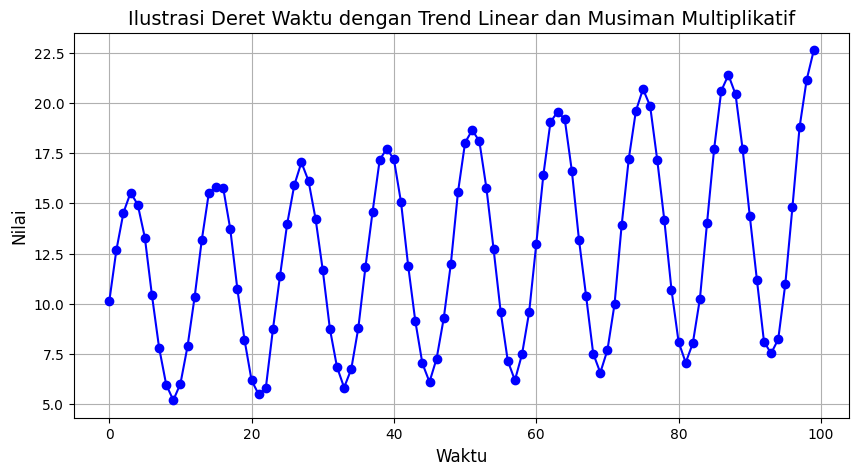

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(x, series_multi, color='b', marker='o')
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.title('Ilustrasi Deret Waktu dengan Trend Linear dan Musiman Multiplikatif', fontsize=14)
plt.grid()
plt.show()

Dekomposisi dengan model multiplikatif hanya bisa dilakukan untuk deret dengan nilai >0, sehingga jika deret memiliki nilai 0 atau negatif maka deret perlu ditransformasi.


kalau ini musiman yang muplikatif karena ragamnya berbeda tiap periode , atau semakin membesar.

In [65]:
#  Dekomposisi dengan model multiplikatif
# mengubah data menjadi format dataframe
df_multi = pd.DataFrame(series_multi, columns=['Value'])

from statsmodels.tsa.seasonal import seasonal_decompose
result_multi = seasonal_decompose(df_multi['Value'], model='multiplicative', period=12)

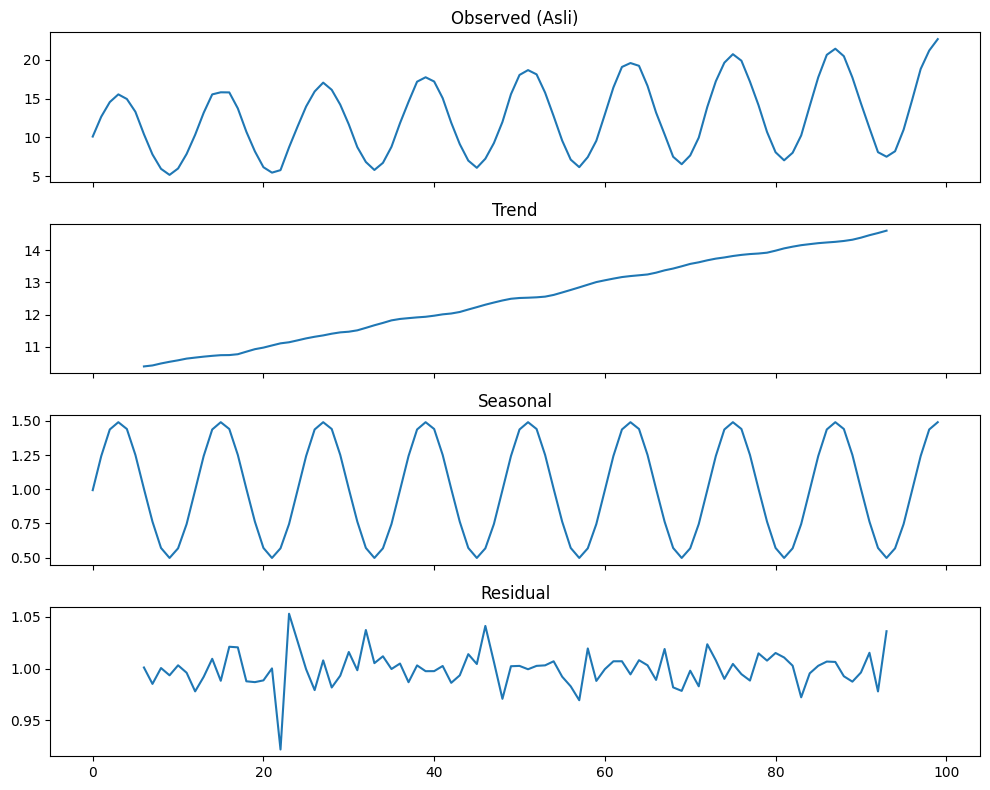

In [66]:
# Plot hasil dekomposisi
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result_multi.observed.plot(ax=axes[0], title='Observed (Asli)')
result_multi.trend.plot(ax=axes[1], title='Trend')
result_multi.seasonal.plot(ax=axes[2], title='Seasonal')
result_multi.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()

In [ ]:
# Parameter
np.random.seed(22025)
n = 100  # Jumlah titik data
x = np.arange(n)

# Hanya noise acak tanpa trend atau musiman
noise = np.random.normal(loc=10, scale=2, size=n)  # Nilai acak sekitar 10

# Buat DataFrame untuk regresi
df = pd.DataFrame({'Time': x, 'Series': noise})
df['Time'] = pd.to_datetime(df['Time'], unit='D')  # Konversi ke format waktu
df.set_index('Time', inplace=True)

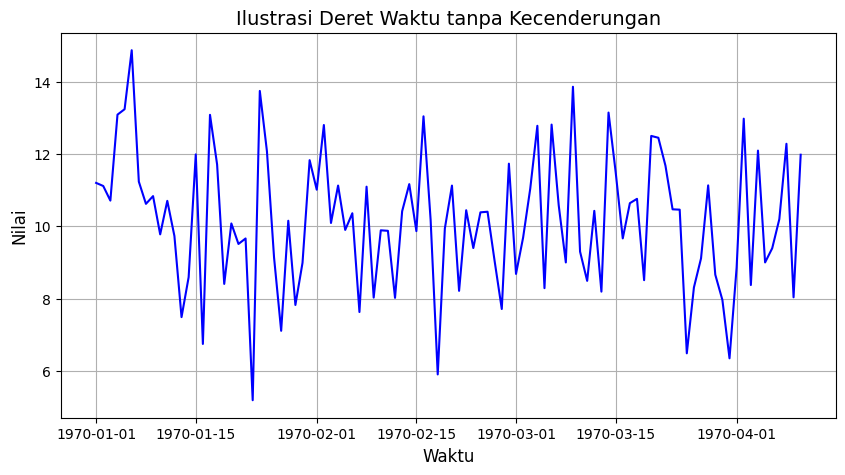

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Series'], color='b')
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.title('Ilustrasi Deret Waktu tanpa Kecenderungan', fontsize=14)
plt.grid()
plt.show()

data ini tidak ada kecenderungannya.
|


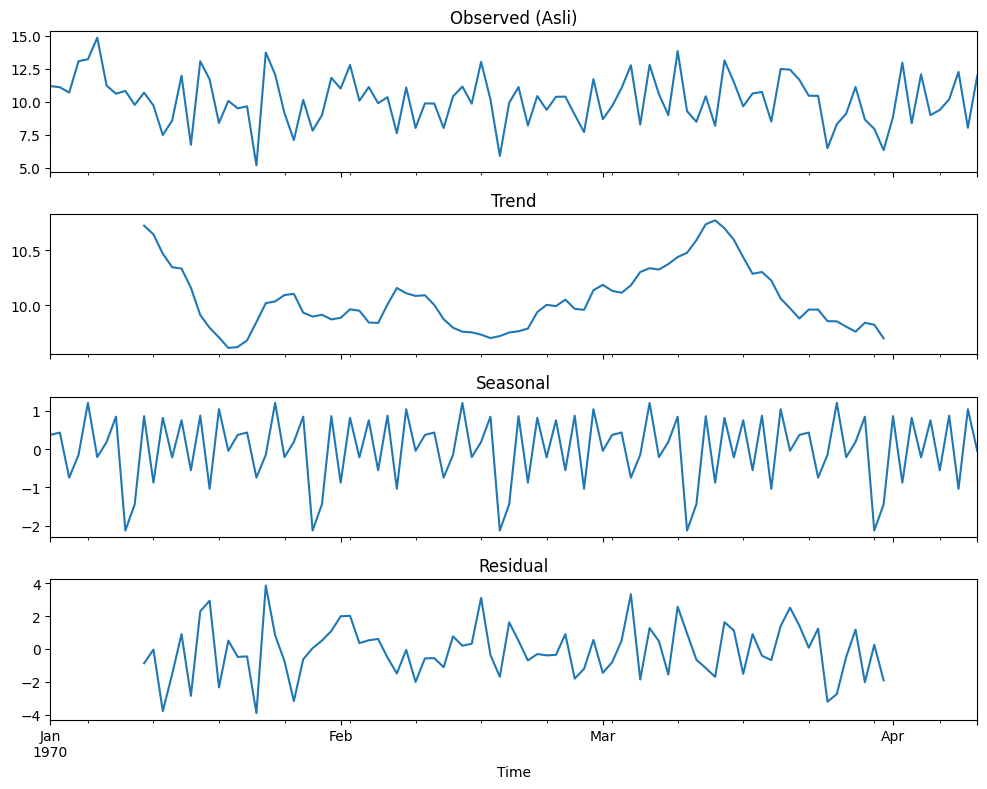

In [ ]:
# Lakukan dekomposisi dengan model aditif
result = seasonal_decompose(df['Series'], model='additive', period=20)

# Plot hasil dekomposisi
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result.observed.plot(ax=axes[0], title='Observed (Asli)')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()